<a href="https://colab.research.google.com/github/ww20hust/Colab/blob/main/CaSignal_Deconvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np   
import matplotlib.pyplot as plt

[0.43261132 1.38665367 0.90780452 0.48001952 0.41089319 0.15791187
 0.14683792 0.07750994 0.29832905 0.07821559 0.10347881 0.18845954
 0.34849749 0.43614073 0.03194411 0.09944908 1.41552374 0.83975922
 0.58037965 0.25690975 0.08016012 0.04192472 0.330142   0.42153314
 0.57180948 0.0995274  0.47686241 0.30863194 0.4863326  0.58379895
 0.0116889  1.2869293  0.53784007 0.25786266 0.1760516  0.26279203
 0.10304825 0.37365828 0.07354547 0.09731287 0.24914585 0.03302713
 0.02461855 0.15584798 0.05437425 0.15800333 1.05700991 0.56856907
 0.37781555 0.14462989 0.45880325 0.18015621 0.26833682 0.29743661
 0.32064113 0.16106596 0.28899748 0.05779852 0.25151158]


<StemContainer object of 3 artists>

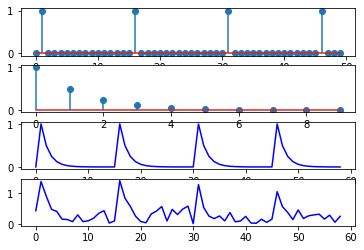

In [3]:
#产生一系列的脉冲峰值模拟真实的钙信号
OriginalSignal = np.zeros(50)
OriginalSignal[1]=1
OriginalSignal[16]=1
OriginalSignal[31]=1
OriginalSignal[46]=1

#产生负指数的卷积模板
Kernel = np.exp(np.arange(0,-7,-0.7))
#根据卷积定义手写卷积函数
def convolution1D(Signal,kernel):
    m = [0 for k in range(len(kernel)+len(Signal)-1)]
    result = np.array(m,dtype=float)
   
    for i in range(len(kernel)):
        for j in range(len(Signal)):
            result[i+j] = result[i+j]+kernel[i]*Signal[j]
    return result

sample = convolution1D(OriginalSignal,Kernel)
#添加噪声
sample_withnoisy = sample + 0.2*abs((np.random.randn(59)))
print(sample_withnoisy)
x = np.arange(59)
plt.subplot(413)
plt.plot(x,   sample,   c='blue',  label='sample')  
plt.subplot(414)
plt.plot(x,   sample_withnoisy,   c='blue',  label='sample')
plt.subplot(411)
plt.stem(OriginalSignal)
plt.subplot(412)
plt.stem(Kernel)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.4965853  1.         0.         ... 0.         0.         0.        ]
 [0.24659696 0.4965853  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0018363  0.00369786 0.00744658]
 [0.         0.         0.         ... 0.         0.0018363  0.00369786]
 [0.         0.         0.         ... 0.         0.         0.0018363 ]]


<StemContainer object of 3 artists>

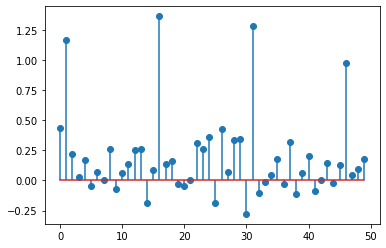

In [4]:
#根据采样得到的信号 并且已知卷积模板 求解输入信号。即由sample_noisy 和 Kernel求解 signal
#利用最小二乘法求解逆卷积,先根据卷积核h,得到矩阵An
An = np.zeros([59,50])
for k in range(50):
    for m in range(len(Kernel)):
        An[m+k][k] = Kernel[m]
print(An)
#根据解析解公式进行逆卷积求解
prediction_signal = np.dot(np.dot(np.linalg.inv(np.dot(An.T, An)),An.T),sample_withnoisy)

#plt.plot(x,   sample,   c='blue',  label='sample')  
plt.stem(prediction_signal)